# Data Exploration

## Purpose:

We will try to find out which variables relate the most to the degree of fatality of a road accident.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Hypothesis #1:

Is there a relation between the use of safety equipments to the degree of fatality of a road accident?

To answer that, we have to look at the 'users' table.

In [2]:
#Import the users table
users = pd.read_csv("./dataset/clean/users.csv")
users

,Num_Acc,place,catu,grav,sex,trip,secu_exist,secu_use,locp,actp,etatp,birth_year,num_veh
0,201600000001,1,1,1,2,0,1,1,0,0,0,1983,B02
1,201600000001,1,1,3,1,9,2,1,0,0,0,2001,A01
2,201600000002,1,1,3,1,5,1,1,0,0,0,1960,A01
3,201600000002,2,2,3,1,0,1,1,0,0,0,2000,A01
4,201600000002,3,2,3,2,0,1,1,0,0,0,1962,A01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1873649,200500087953,1,1,1,1,0,1,3,0,0,0,1972,B01
1873650,200500087953,1,1,1,1,0,1,3,0,0,0,1965,C01
1873651,200500087953,1,1,4,1,5,2,3,0,0,0,1990,A01
1873652,200500087954,1,1,4,1,0,1,3,0,0,0,1951,A01


Concerning hypothesis #1, the relevant features are 'grav', which indicates degree of fatality, 'secu_exist' which indicates type of safety equipment available, and 'secu_use' which indicates the use of the safety equipment. Both variables are categorical.

The explanation of each values are as follows:

<div style="display:flex">

<div style="margin:20px">
<h5 align="center">grav value and meaning table:</h5>

|Value | Meaning        |
|------|--------------- |
| 1    | No injuries    |
| 2    | Killed         |
| 3    | Hospitalised   |
| 4    | Light injuries |
</div>

<div style="margin:20px">
<h5 align="center">secu_exist value and meaning table:</h5>

|Value | Meaning              |
|------|--------------------- |
| 1    | Belt                 |
| 2    | Helmet               |
| 3    | Child seat           |
| 4    | Reflective equipment |
| 9    | Other                |
</div>
    
<div style="margin:20px">    
<h5 align="center">secu_use value and meaning table:</h5>

|Value | Meaning            |
|------|------------------- |
| 1    | Used               |
| 2    | Not used           |
| 3    | Not determinable   |
</div>
    
</div>

Any other value other than those defined in the table will be dropped for data integrity.

In [3]:
#Drop non-used columns

used_cols = ["Num_Acc","grav","secu_exist","secu_use"]

users = users.loc[:,used_cols]

#Drop non-used values

def drop_values(df,used_value_dict):
    temp_df = df
    for column in used_value_dict.keys():
        temp_df = temp_df.loc[temp_df[column].isin(used_value_dict[column]),:]
    return temp_df

used_value_dict = {
    'grav':[1,2,3,4],
    'secu_exist':[1,2,3,4,9],
    'secu_use':[1,2,3]
}

users = drop_values(users,used_value_dict)

In addition, we might have to map the values to be more intuitive:

<div style="margin:20px">
<h5 align="center">New grav value and meaning table:</h5>

| New Value | Old Value | Meaning        |
|-----------|-----------|----------------|
| 1         | 1         | No injuries    |
| 2         | 4         | Light injuries |
| 3         | 3         | Hospitalised   |
| 4         | 2         | Killed         |
</div>
    
<div style="margin:20px">    
<h5 align="center">New secu_exist value and meaning table:</h5>

| New Value            | Old Value | Meaning              |
|----------------------|-----------|----------------------|
| Belt                 | 1         | Belt                 |
| Helmet               | 2         | Helmet               |
| Child seat           | 3         | Child seat           |
| Reflective equipment | 4         | Reflective equipment |
| Other                | 9         | Other                |
</div>    
    
<div style="margin:20px">    
<h5 align="center">New secu_use value and meaning table:</h5>

| New Value | Old Value | Meaning          |
|-----------|-----------|------------------|
| -1        | 2         | Not used         |
| 0         | 3         | Not determinable |
| 1         | 1         | Used             |
</div>



In [4]:
#Map new value
def map_new_value(df,value_map_dict):
    temp_df = df
    for column in value_map_dict.keys():
        temp_df[column] = temp_df[column].map(value_map_dict[column])
    return temp_df

value_map_dict = {
    'grav':{
        1:1,
        4:2,
        3:3,
        2:4
    },
    'secu_exist':{
        1:'Belt',
        2:'Helmet',
        3:'Child seat',
        4:'Reflective equipment',
        9:'Other'
    },
    'secu_use':{
        2:-1,
        3:0,
        1:1
    }
}

users = map_new_value(users,value_map_dict)

To gain an initial sense on how the three variables are related, we may look at the count of each combination of variables:

In [5]:
#Find the number of accidents of each combination of variables
users_grouped_by_secu = users.groupby(["secu_exist","secu_use"])
users_grouped_by_secu_count = users_grouped_by_secu.size().rename("grav").reset_index()

pivot_accident_count = pd.pivot(users_grouped_by_secu_count,index="secu_exist",columns="secu_use",values="grav")
pivot_accident_count["Total"] = pivot_accident_count.sum(axis=1)
pivot_accident_count = pivot_accident_count.append(pivot_accident_count.sum().rename("Total"))
pivot_accident_count

secu_use,-1,0,1,Total
secu_exist,,,,
Belt,32400,147718,1041800,1221918
Child seat,689,718,12727,14134
Helmet,19497,37141,341617,398255
Other,5865,99367,6612,111844
Reflective equipment,1395,1850,2227,5472
Total,59846,286794,1404983,1751623


It is seen that an overwhelming majority of road accidents are that of type secu_use=1 and secu_exist=1, which means that the majority of road accidents in France are the case where people use seatbelts.

Now this doesn't say anything about the likelihood of fatality for each category. In order to find that out, we may need to look at the mean of 'grav' (degree of fatality) for each category.

secu_use,-1,0,1,Mean
secu_exist,,,,
Belt,2.460957,1.546298,1.609269,1.872174
Child seat,2.316401,1.980501,1.796417,2.031106
Helmet,2.552393,2.173016,2.327905,2.351105
Other,2.161807,2.127608,1.813521,2.034312
Reflective equipment,2.554122,2.143243,2.186798,2.294721
Mean,2.409136,1.994133,1.946782,2.116684


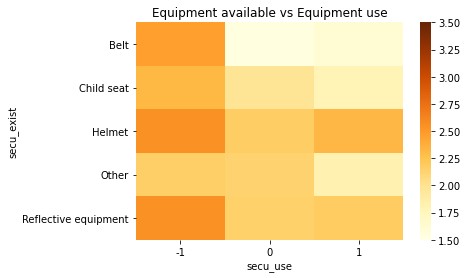

In [11]:
#Find the average degree of fatality of accidents of each combination of variables
users_grouped_by_secu = users.groupby(["secu_exist","secu_use"])
users_grouped_by_secu_grav_mean = users_grouped_by_secu.mean()["grav"].rename("grav").reset_index()

pivot_grav_mean = pd.pivot(users_grouped_by_secu_grav_mean,index="secu_exist",columns="secu_use",values="grav")
pivot_grav_mean["Mean"] = pivot_grav_mean.mean(axis=1)
pivot_grav_mean = pivot_grav_mean.append(pivot_grav_mean.mean().rename("Mean"))

ax = sns.heatmap(pivot_grav_mean.iloc[:-1,:-1],cmap="YlOrBr",vmin=1.5,vmax=3.5)
ax.set_title("Equipment available vs Equipment use")
pivot_grav_mean